In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [5]:
filepath = r"/kaggle/input/nlp-getting-started/train.csv"

In [6]:
data = pd.read_csv(filepath)

In [7]:
df = pd.DataFrame(data)

In [8]:
df.iloc[:10]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [9]:
 df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
def isnull(dataframe,col_name):
    values = []
    for i in dataframe[col_name]:
        if pd.isnull(i):
            values.append(0)
        else: 
            values.append(1)
    return values

In [11]:
df['has_location'] = isnull(df,'location')

In [12]:
df.iloc[:10]

,id,keyword,location,text,target,has_location
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,0
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,0
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,0
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,0


In [13]:
df.dropna(subset=['keyword'],inplace = True)
df.iloc[:10]

,id,keyword,location,text,target,has_location
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,1
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,0
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,1
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,1


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [16]:
translator = str.maketrans("", "", string.punctuation)

In [17]:
for index,row in df.iterrows():
    if row['has_location'] == 1:
        df.loc[index,'location'] = row['location'].lower().translate(translator)

In [18]:
df['text'] = df['text'].apply(lambda x: x.lower().translate(translator))
df.iloc[:10]

,id,keyword,location,text,target,has_location
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1,1
32,49,ablaze,est september 2012 bristol,we always try to bring the heavy metal rt http...,0,1
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1,1
34,52,ablaze,philadelphia pa,crying out for more set me ablaze,0,1
35,53,ablaze,london uk,on plus side look at the sky last night it was...,0,1
36,54,ablaze,pretoria,phdsquares mufc theyve built so much hype arou...,0,1
37,55,ablaze,world wide,inec office in abia set ablaze httptco3imaomknna,1,1
38,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set a...,1,0
39,57,ablaze,paranaque city,ablaze for you lord d,0,1
40,59,ablaze,live on webcam,check these out httptcoroi2nsmejj httptco3tj8z...,0,1


In [19]:

def tokenize(text):
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [21]:
df['tokens'] = df['text'].apply(lambda x: tokenize(x))
df.iloc[:10]

,id,keyword,location,text,target,has_location,tokens
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1,1,"[bbcmtd, wholesale, markets, ablaze, httptcolh..."
32,49,ablaze,est september 2012 bristol,we always try to bring the heavy metal rt http...,0,1,"[always, try, bring, heavy, metal, rt, httptco..."
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1,1,"[africanbaze, breaking, newsnigeria, flag, set..."
34,52,ablaze,philadelphia pa,crying out for more set me ablaze,0,1,"[crying, set, ablaze]"
35,53,ablaze,london uk,on plus side look at the sky last night it was...,0,1,"[plus, side, look, sky, last, night, ablaze, h..."
36,54,ablaze,pretoria,phdsquares mufc theyve built so much hype arou...,0,1,"[phdsquares, mufc, theyve, built, much, hype, ..."
37,55,ablaze,world wide,inec office in abia set ablaze httptco3imaomknna,1,1,"[inec, office, abia, set, ablaze, httptco3imao..."
38,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set a...,1,0,"[barbados, bridgetown, jamaica, ûò, two, cars..."
39,57,ablaze,paranaque city,ablaze for you lord d,0,1,"[ablaze, lord]"
40,59,ablaze,live on webcam,check these out httptcoroi2nsmejj httptco3tj8z...,0,1,"[check, httptcoroi2nsmejj, httptco3tj8zjin21, ..."


In [22]:
stemmer = PorterStemmer()

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Apply stemming to the 'tokens' column
df['tokens'] = df['tokens'].apply(stem_tokens)

In [23]:
df.iloc[:10]

,id,keyword,location,text,target,has_location,tokens
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1,1,"[bbcmtd, wholesal, market, ablaz, httptcolhyxe..."
32,49,ablaze,est september 2012 bristol,we always try to bring the heavy metal rt http...,0,1,"[alway, tri, bring, heavi, metal, rt, httptcoy..."
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1,1,"[africanbaz, break, newsnigeria, flag, set, ab..."
34,52,ablaze,philadelphia pa,crying out for more set me ablaze,0,1,"[cri, set, ablaz]"
35,53,ablaze,london uk,on plus side look at the sky last night it was...,0,1,"[plu, side, look, sky, last, night, ablaz, htt..."
36,54,ablaze,pretoria,phdsquares mufc theyve built so much hype arou...,0,1,"[phdsquar, mufc, theyv, built, much, hype, aro..."
37,55,ablaze,world wide,inec office in abia set ablaze httptco3imaomknna,1,1,"[inec, offic, abia, set, ablaz, httptco3imaomk..."
38,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set a...,1,0,"[barbado, bridgetown, jamaica, ûò, two, car, ..."
39,57,ablaze,paranaque city,ablaze for you lord d,0,1,"[ablaz, lord]"
40,59,ablaze,live on webcam,check these out httptcoroi2nsmejj httptco3tj8z...,0,1,"[check, httptcoroi2nsmejj, httptco3tj8zjin21, ..."


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the 'tokens_str' column into TF-IDF vectors
tfidf_vectors = tfidf.fit_transform(df['tokens_str'])

# Create a new DataFrame with TF-IDF vectors
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names_out())

# Concatenate the original DataFrame with the TF-IDF DataFrame
tfidf_df = tfidf_df.reset_index(drop=True)
df = df.reset_index(drop=True)

df_tfidf = pd.concat([df, tfidf_df], axis=1)


In [26]:
df_tfidf.head(10)

,id,keyword,location,text,target,has_location,tokens,tokens_str,0011,001116,...,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóbbc,ûóher,ûókodi,ûóneglig,ûótech,ûów
0,48,ablaze,birmingham,bbcmtd wholesale markets ablaze httptcolhyxeohy6c,1,1,"[bbcmtd, wholesal, market, ablaz, httptcolhyxe...",bbcmtd wholesal market ablaz httptcolhyxeohy6c,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,49,ablaze,est september 2012 bristol,we always try to bring the heavy metal rt http...,0,1,"[alway, tri, bring, heavi, metal, rt, httptcoy...",alway tri bring heavi metal rt httptcoyao1e0xngw,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1,1,"[africanbaz, break, newsnigeria, flag, set, ab...",africanbaz break newsnigeria flag set ablaz ab...,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
3,52,ablaze,philadelphia pa,crying out for more set me ablaze,0,1,"[cri, set, ablaz]",cri set ablaz,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
4,53,ablaze,london uk,on plus side look at the sky last night it was...,0,1,"[plu, side, look, sky, last, night, ablaz, htt...",plu side look sky last night ablaz httptcoqqsm...,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
5,54,ablaze,pretoria,phdsquares mufc theyve built so much hype arou...,0,1,"[phdsquar, mufc, theyv, built, much, hype, aro...",phdsquar mufc theyv built much hype around new...,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
6,55,ablaze,world wide,inec office in abia set ablaze httptco3imaomknna,1,1,"[inec, offic, abia, set, ablaz, httptco3imaomk...",inec offic abia set ablaz httptco3imaomknna,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
7,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set a...,1,0,"[barbado, bridgetown, jamaica, ûò, two, car, ...",barbado bridgetown jamaica ûò two car set abl...,0.0,0.0,...,0.0,0.0,0.0,0.2179,0.0,0.0,0.0,0.0,0.0,0.0
8,57,ablaze,paranaque city,ablaze for you lord d,0,1,"[ablaz, lord]",ablaz lord,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
9,59,ablaze,live on webcam,check these out httptcoroi2nsmejj httptco3tj8z...,0,1,"[check, httptcoroi2nsmejj, httptco3tj8zjin21, ...",check httptcoroi2nsmejj httptco3tj8zjin21 http...,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
final_df = pd.concat([tfidf_df,df['target']], axis=1)


In [28]:
final_df.head(10)

,0011,001116,0025,005225,010156,010217,0104,010401,0106,0111,...,ûòthe,ûòåêcnbc,ûó,ûóbbc,ûóher,ûókodi,ûóneglig,ûótech,ûów,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2179,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
from sklearn.model_selection import train_test_split
X = tfidf_df
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train,y_train)

SVC()

In [31]:
pred = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       874
           1       0.85      0.63      0.73       637

    accuracy                           0.80      1511
   macro avg       0.81      0.78      0.78      1511
weighted avg       0.81      0.80      0.79      1511



<Axes: >

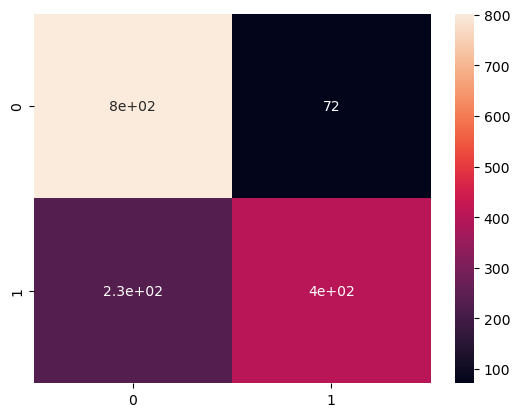

In [37]:
import seaborn as sns
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,annot=True)

In [38]:
#test

test = pd.read_csv(r"/kaggle/input/nlp-getting-started/test.csv")

In [39]:
test_df = pd.DataFrame(test)
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [40]:
test_df['text'] = test_df['text'].apply(lambda x: x.lower().translate(translator))
test_df.iloc[:10]

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan
5,12,NaN,NaN,were shakingits an earthquake
6,21,NaN,NaN,theyd probably still show more life than arsen...
7,22,NaN,NaN,hey how are you
8,27,NaN,NaN,what a nice hat
9,29,NaN,NaN,fuck off


In [41]:
test_df['tokens'] = test_df['text'].apply(lambda x: tokenize(x))
test_df['tokens'] = test_df['tokens'].apply(stem_tokens)
test_df.head(10)

,id,keyword,location,text,tokens
0,0,NaN,NaN,just happened a terrible car crash,"[happen, terribl, car, crash]"
1,2,NaN,NaN,heard about earthquake is different cities sta...,"[heard, earthquak, differ, citi, stay, safe, e..."
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,"[forest, fire, spot, pond, gees, flee, across,..."
3,9,NaN,NaN,apocalypse lighting spokane wildfires,"[apocalyps, light, spokan, wildfir]"
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan,"[typhoon, soudelor, kill, 28, china, taiwan]"
5,12,NaN,NaN,were shakingits an earthquake,"[shakingit, earthquak]"
6,21,NaN,NaN,theyd probably still show more life than arsen...,"[theyd, probabl, still, show, life, arsen, yes..."
7,22,NaN,NaN,hey how are you,[hey]
8,27,NaN,NaN,what a nice hat,"[nice, hat]"
9,29,NaN,NaN,fuck off,[fuck]


In [60]:
# Assuming 'tfidf' is the pre-fitted TfidfVectorizer

# Get the feature names from the vectorizer
feature_names = tfidf.get_feature_names_out()

# Apply the same preprocessing steps on the test data
test_df['tokens_str'] = test_df['tokens'].apply(lambda x: ' '.join(x))

# Transform the test data using the pre-fitted vectorizer and feature names
tfidf_vectors_test = tfidf.transform(test_df['tokens_str'])
tfidf_df_test = pd.DataFrame(tfidf_vectors_test.toarray(), columns=feature_names)

# Concatenate the original DataFrame with the TF-IDF DataFrame
test_df_tfidf = pd.concat([test_df.drop(['tokens', 'tokens_str'], axis=1), tfidf_df_test], axis=1)


In [61]:
test_df_tfidf.head(10)

,id,keyword,location,text,0011,001116,0025,005225,010156,010217,...,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóbbc,ûóher,ûókodi,ûóneglig,ûótech,ûów
0,0,NaN,NaN,just happened a terrible car crash,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,NaN,NaN,heard about earthquake is different cities sta...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,NaN,NaN,apocalypse lighting spokane wildfires,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12,NaN,NaN,were shakingits an earthquake,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,21,NaN,NaN,theyd probably still show more life than arsen...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,22,NaN,NaN,hey how are you,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,27,NaN,NaN,what a nice hat,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,29,NaN,NaN,fuck off,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
test_pred = model.predict(tfidf_df_test)

In [64]:
test_pred

array([1, 1, 1, ..., 1, 1, 0])

In [65]:
result_df = pd.DataFrame({'id': test_df['id'], 'target': test_pred})

In [66]:
result_df.to_csv('predictions.csv', index=False)